In [1]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
import pickle

In [ ]:
!wget http://www.romeokienzler.com/watsoniotp.healthy.pickle
!wget http://www.romeokienzler.com/watsoniotp.broken.pickle

In [3]:
data_healthy = pickle.load(open('watsoniotp.healthy.pickle', 'rb'))
data_broken = pickle.load(open('watsoniotp.broken.pickle', 'rb'))

In [4]:
data_healthy = data_healthy.reshape(3000,3)
data_broken = data_broken.reshape(3000,3)

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_healthy[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,2], '-', color='green', animated = True, linewidth=1)

In [ ]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_broken[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken[:,2], '-', color='green', animated = True, linewidth=1)

In [5]:
import numpy as np
data_healthy_fft = np.fft.fft(data_healthy)
data_broken_fft = np.fft.fft(data_broken)

In [6]:
import numpy as np
import sklearn
from  sklearn.preprocessing import MinMaxScaler

def scaleData(data):
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

In [7]:
data_healthy_scaled = scaleData(data_healthy)
data_broken_scaled = scaleData(data_broken)

In [ ]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_healthy_fft[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,2], '-', color='green', animated = True, linewidth=1)


In [ ]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_broken_fft[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,2], '-', color='green', animated = True, linewidth=1)

In [15]:
timesteps = 10
dim = 3
samples = 3000
data_healthy_scaled_reshaped = data_healthy_scaled
data_healthy_scaled_reshaped.shape = (samples/timesteps,timesteps,dim)
#(3000,1,1)

In [25]:
losses = []

def handleLoss(loss):
        global losses
        losses+=[loss]
        print loss

In [17]:
from keras.callbacks import Callback
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        handleLoss(logs.get('loss'))

In [52]:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
# design network

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

def train(data):
    data.shape = (300, 10, 3)
    model.fit(data, data, epochs=50, batch_size=72, validation_data=(data, data), verbose=0, shuffle=False,callbacks=[LossHistory()])
    data.shape = (3000, 3)

def score(data):
    data.shape = (300, 10, 3)
    yhat =  model.predict(data)
    yhat.shape = (3000, 3)
    return yhat

In [ ]:
def sse(y,yhat):
    return sum(map(lambda ((a,b,c),(x,y,z)) : pow(a-x,2)+pow(b-y,2)+pow(c-z,2),zip(y,yhat)))

In [ ]:
import pandas as pd



for i in range(20):
    
    print "----------------"
    train(data_healthy_scaled)
    yhat_healthy = score(data_healthy_scaled)
    yhat_broken = score(data_broken_scaled)
    data_healthy_scaled.shape = (3000, 3)
    data_broken_scaled.shape = (3000, 3)
    print sse(data_healthy_scaled,yhat_healthy)/3000
    print sse(data_broken_scaled,yhat_broken)/3000


print "----------------broken"
train(data_broken_scaled)
yhat_healthy = score(data_healthy_scaled)
yhat_broken = score(data_broken_scaled)
data_healthy_scaled.shape = (3000, 3)
data_broken_scaled.shape = (3000, 3)
print sse(data_healthy_scaled,yhat_healthy)/3000
print sse(data_broken_scaled,yhat_broken)/3000


----------------


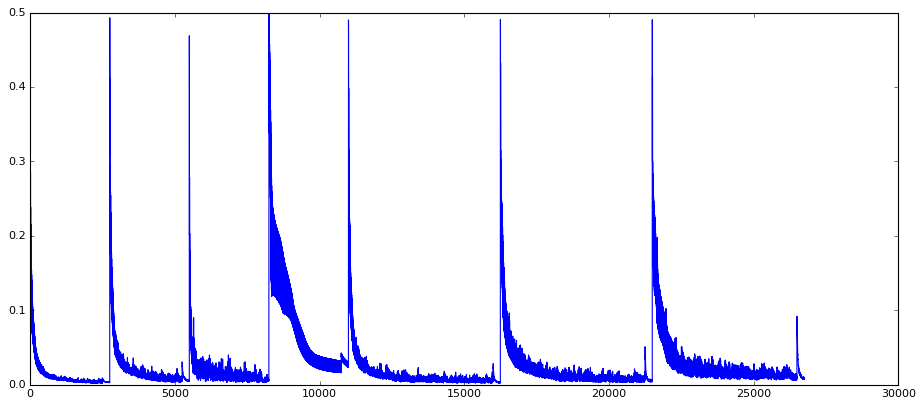

In [51]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,len(losses)), losses, '-', color='blue', animated = True, linewidth=1)

In [ ]:
#!pip install ibmiotf

In [14]:
import ibmiotf.application

In [15]:
options = {"org": "mh741h", "id": "anything", "auth-method": "apikey", "auth-key": "a-mh741h-hwv6qlpmsv", "auth-token": "zBcbK&rKTfbW*OfneW"}
client = ibmiotf.application.Client(options)
client.connect()

2017-12-01 10:23:55,885   ibmiotf.application.Client  INFO    Connected successfully: a:mh741h:anything


In [16]:
from Queue import Queue
q = Queue(7000)

In [17]:
def myEventCallback(event):
    sample = event.data
    point = [sample["x"], sample["y"],sample["z"]]
    q.put(point)

client.deviceEventCallback = myEventCallback
client.subscribeToDeviceEvents("0.16.2", "lorenz", "osc")

True

In [18]:
def doNN(data):
    data_scaled = scaleData(data)
    train(data_scaled)
    yhat = score(data_scaled)
    data_scaled.shape = (3000, 3)
    print sse(data_scaled,yhat)/3000

In [19]:
def handleLoss(loss):
        myData={'loss' : str(loss)}
        client.publishEvent("0.16.2", "lorenz", "status", "json", myData)

In [ ]:
import numpy as np
while True:
    while not q.empty():
        point = q.get()
        try:
            data
        except NameError:
            data = np.array(point)
        else:
            data = np.append(data,point)
        if data.size>=9000:
            data = np.reshape(data,(3000,3))
            print data
            doNN(data)
            del data


In [ ]:
q.qsize()

In [ ]:
del data

In [ ]:
data.size

In [ ]:
!pip install h5py

In [ ]:
import paho.mqtt.client as mqtt

In [ ]:

def on_message(client, userdata, message):
    raw = message.payload.decode("utf-8")
    sample = json.loads(raw)
    point = [sample["x"], sample["y"],sample["z"]]
    q.put(point)
    
client=mqtt.Client()
client.connect("localhost",1883,60)
client.on_message=on_message
client.subscribe("lorenz")
client.loop_start()

In [ ]:
import json

In [ ]:
q.qsize()

In [ ]:
point['x']

In [ ]:
client.disconnect() #disconnect
client.loop_stop() #stop loop

In [ ]:
client.publish("mytopic/can/be/nested","anything will do incl. binary")